Linked Structures
=================



## Agenda



1.  Motives
2.  Objectives
3.  Mechanisms
4.  Linked Data Structures



## 1.  Motives



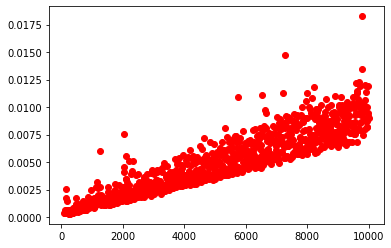

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

def time_array_front_insert_delete(n):
    return timeit('lst.insert(0, None) ; del lst[0]',
                  'lst = list(range({}))'.format(n),
                  number=1000)

ns = np.linspace(100, 10000, 1000)
plt.plot(ns, [time_array_front_insert_delete(int(n)) for n in ns], 'ro')
plt.show()

In [14]:
# consider:

def concatenate(arr1, arr2):
    """Concatenates the contents of arr1 and arr2 as efficiently (time-wise)
    as possible, so that the resulting structure can be used to index all
    combined elements (arr1's followed by arr2's)."""
    pass

def concat1(arr1, arr2):
    # O()
    for x in arr2:
        arr1.append(x)
    return arr1

def concat2(arr1, arr2):
    # O()
    arr1.extend(arr2)
    return arr1

def concat3(arr1, arr2):
    # O()
    return arr1 + arr2

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

def time_array_front_insert_delete(n):
    return timeit('del lst[{} - 1]'.format(n), 'from __main__ import MyActualArrayList', 'lst = MyActualArrayList''lst = list(range({}))'.format(n), number=1000)

ns = np.linspace(100, 10000, 50)
plt.plot(ns, [time_array_front_insert_delete(int(n)) for n in ns], 'ro')
plt.show()

IndexError: list assignment index out of range

## 1.  Objectives



We would like a new data storage mechanism for constructing data
structures that:

-   does not require monolithic, contiguous memory allocation,
-   allows individual elements to be flexibly and efficiently reorganized,
-   and preserves the ability to locate (e.g., via position) and iterate

over elements



## 1.  Mechanisms



### 3.1. Two-Element Lists



In [1]:
# data items
i1 = 'lions'
i2 = 'tigers'
i3 = 'bears'
i4 = 'oh, my'

In [1]:
# creating individual "links"
l1 = [,]
l2 = [,]
l3 = [,]
l4 = [,]

In [1]:
# link-ing them together

In [1]:
# iteration

In [1]:
# prepending

i0 = 'walruses'

In [1]:
# insertion

i2_5 = 'elephants'

In [1]:
# deletion

### 3.2. "Link" objects



In [1]:
class Link:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

In [1]:
# manually constructing a list

In [1]:
# prepending

def prepend(l, val):
    pass

In [1]:
l = None
for x in range(10):
    l = prepend(l, x)

In [1]:
# iterator

def link_iterator(l):
    yield

In [1]:
for x in link_iterator(l):
    print(x)

In [1]:
# iteration based on a recursive pattern

def link_iterator_rec(l):
    yield

In [1]:
for x in link_iterator_rec(l):
    print(x)

## 1.  Linked Data Structures



### 4.1 Linked List



In [1]:
class LinkedList:
    class Link:
        def __init__(self, val, next=None):
            self.val = val
            self.next = next

    def __init__(self):
        self.head = None

    def prepend(self, val):
        pass

    def __iter__(self):
        pass

    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'

In [1]:
l = LinkedList()
for x in range(10):
    l.prepend(x)
l

### 4.2 Binary Tree



In [1]:
class BinaryLink:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [1]:
# manual construction of a "tree" representing the expression ((5+3)*(8-4))
t = BinaryLink('*')
t.left = BinaryLink('+')
t.left.left  = BinaryLink('5')
t.left.right = BinaryLink('3')
t.right = BinaryLink('-')
t.right.left  = BinaryLink('8')
t.right.right = BinaryLink('4')

In [1]:
def print_expr_tree(t):
    if t:
        if not t.val.isdigit():
            print('(', end='')
        print_expr_tree(t.left)
        print(t.val, end='')
        print_expr_tree(t.right)
        if not t.val.isdigit():
            print(')', end='')

In [1]:
print_expr_tree(t)

### 4.3 N-ary Tree



In [1]:
class NaryLink:
    def __init__(self, val, n=2):
        self.val = val
        self.children = [None] * n

    def __getitem__(self, idx):
        return self.children[idx]

    def __setitem__(self, idx, val):
        self.children[idx] = val

    def __iter__(self):
        for c in self.children:
            yield c

In [1]:
root = NaryLink('Kingdoms', n=5)

root[0] = NaryLink('Animalia', n=35)
root[1] = NaryLink('Plantae', n=12)
root[2] = NaryLink('Fungi', n=7)
root[3] = NaryLink('Protista', n=5)
root[4] = NaryLink('Monera', n=5)

root[2][0] = NaryLink('Chytridiomycota')
root[2][1] = NaryLink('Blastocladiomycota')
root[2][2] = NaryLink('Glomeromycota')
root[2][3] = NaryLink('Ascomycota')
root[2][4] = NaryLink('Basidiomycota')
root[2][5] = NaryLink('Microsporidia')
root[2][6] = NaryLink('Neocallimastigomycota')

def tree_iter(root):
    if root:
        yield root.val
        for c in root:
            yield from tree_iter(c)

In [1]:
for x in tree_iter(root):
    print(x)